In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [27]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [30]:
svm = SVC(kernel='linear',C=1.0,degree=2)

In [31]:
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.8741258741258742

In [47]:
from sklearn.model_selection import cross_val_score, validation_curve

In [44]:
svm = SVC(kernel='linear')
scores = cross_val_score(svm,X,y,cv=5)

In [45]:
scores

array([0.94736842, 0.92982456, 0.97368421, 0.92105263, 0.95575221])

In [46]:
scores.mean()

0.9455364073901569

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
train_scores, test_scores = validation_curve(KNeighborsClassifier(),
                                             X,y,param_name='n_neighbors',param_range=range(1,11),cv=5)

In [69]:
train_scores.mean(axis=1)

array([1.        , 0.96880374, 0.9538664 , 0.94991132, 0.94727588,
       0.94244168, 0.94200405, 0.94068537, 0.94200405, 0.94156449])

In [76]:
test_scores.mean(axis=1)

0.9314702685918336

In [77]:
from sklearn.model_selection import cross_val_score, validation_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [78]:
X,y = load_breast_cancer(return_X_y=True)

In [106]:
dt = DecisionTreeClassifier(max_depth=2)
train_scores, test_scores = validation_curve(dt,X,y,param_name='max_depth',
                                            param_range=range(1,21),cv=5)

In [98]:
train_scores.mean(axis=1)

array([0.92399171, 0.95167052, 0.95738095, 0.96836707, 0.97759398,
       0.98637941, 0.99121265, 0.99736457, 0.99912088, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [99]:
test_scores.mean(axis=1)

array([0.90866325, 0.94027325, 0.93850334, 0.93150132, 0.9244372 ,
       0.93320913, 0.93148579, 0.91917404, 0.92092843, 0.92620711,
       0.9244372 , 0.92266729, 0.9244372 , 0.92268281, 0.92094395,
       0.92269834, 0.92092843, 0.92268281, 0.92269834, 0.92092843])

In [115]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [116]:
dt.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.83414708, 0.03742368, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.12842924, 0.        , 0.        ])

In [117]:
from sklearn.tree import plot_tree

[Text(167.4, 181.2, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(83.7, 108.72, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(41.85, 36.23999999999998, 'gini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.476\nsamples = 46\nvalue = [28, 18]'),
 Text(251.10000000000002, 108.72, 'X[21] <= 19.91\ngini = 0.109\nsamples = 190\nvalue = [179, 11]'),
 Text(209.25, 36.23999999999998, 'gini = 0.498\nsamples = 17\nvalue = [8, 9]'),
 Text(292.95, 36.23999999999998, 'gini = 0.023\nsamples = 173\nvalue = [171, 2]')]

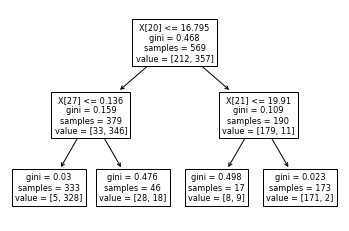

In [118]:
plot_tree(dt)

In [126]:
altura = 2
(2**(altura)-1)

3

### Valores faltantes

In [127]:
import numpy as np
import pandas as pd

In [130]:
frutas = pd.read_csv('fruit_data_with_colors_miss.txt',sep='\t',na_values=['.','?'])

In [134]:
frutas['mass'].isna().sum()

1

In [135]:
# Se 10% dos valores de uma coluna forem faltantes, a coluna deve ser apagada
# Se 25% dos valores de uma coluna forem faltantes, a coluna deve ser apagada

In [139]:
frutas.isna().sum() / frutas.shape[0] * 100

fruit_label      0.000000
fruit_name       0.000000
fruit_subtype    1.694915
mass             1.694915
width            0.000000
height           1.694915
color_score      0.000000
dtype: float64

In [151]:
frutas = frutas.fillna(frutas.mean())

In [160]:
frutas[frutas['fruit_name']=='mandarin'].fillna('mandarin')

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
3,2,mandarin,mandarin,164.448276,6.2,4.7,0.80
4,2,mandarin,mandarin,84.000000,6.0,4.6,0.79
5,2,mandarin,mandarin,80.000000,5.8,4.3,0.77
6,2,mandarin,mandarin,80.000000,5.9,4.3,0.81
7,2,mandarin,mandarin,76.000000,5.8,4.0,0.81


##### Utilizar uma regressão linear pra predizer o valor faltante

In [161]:
frutas = pd.read_csv('fruit_data_with_colors_miss.txt',sep='\t',na_values=['.','?'])

In [165]:
X = frutas[frutas['height'].notna()][['width','color_score']]
y = frutas[frutas['height'].notna()]['height']

In [166]:
from sklearn.linear_model import LinearRegression

In [167]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [170]:
lr.predict(frutas[frutas['height'].isna()][['width','color_score']])

array([7.01330847])

In [171]:
frutas.fillna(frutas.mean())

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.000000,8.4,7.300000,0.55
1,1,apple,granny_smith,180.000000,8.0,6.800000,0.59
2,1,apple,granny_smith,176.000000,7.4,7.200000,0.60
3,2,mandarin,mandarin,164.448276,6.2,4.700000,0.80
4,2,mandarin,mandarin,84.000000,6.0,4.600000,0.79
5,2,mandarin,mandarin,80.000000,5.8,4.300000,0.77
6,2,mandarin,mandarin,80.000000,5.9,4.300000,0.81
7,2,mandarin,NaN,76.000000,5.8,4.000000,0.81
8,1,apple,braeburn,178.000000,7.1,7.691379,0.92
9,1,apple,braeburn,172.000000,7.4,7.000000,0.89


In [172]:
frutas[frutas['fruit_name']=='apple']

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192.0,8.4,7.3,0.55
1,1,apple,granny_smith,180.0,8.0,6.8,0.59
2,1,apple,granny_smith,176.0,7.4,7.2,0.60
8,1,apple,braeburn,178.0,7.1,NaN,0.92
9,1,apple,braeburn,172.0,7.4,7.0,0.89
10,1,apple,braeburn,166.0,6.9,7.3,0.93
11,1,apple,braeburn,172.0,7.1,7.6,0.92
12,1,apple,braeburn,154.0,7.0,7.1,0.88
13,1,apple,golden_delicious,164.0,7.3,7.7,0.70
14,1,apple,golden_delicious,152.0,7.6,7.3,0.69


##### Preprocessamento de atributos categóricos

In [175]:
frutas = pd.read_table('fruit_data_with_colors.txt',sep='\t')

In [183]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [178]:
le = LabelEncoder()

In [180]:
frutas['fruit_subtype']

0         granny_smith
1         granny_smith
2         granny_smith
3             mandarin
4             mandarin
5             mandarin
6             mandarin
7             mandarin
8             braeburn
9             braeburn
10            braeburn
11            braeburn
12            braeburn
13    golden_delicious
14    golden_delicious
15    golden_delicious
16    golden_delicious
17    golden_delicious
18         cripps_pink
19         cripps_pink
20         cripps_pink
21         cripps_pink
22         cripps_pink
23         cripps_pink
24       spanish_jumbo
25       spanish_jumbo
26       spanish_jumbo
27    selected_seconds
28    selected_seconds
29    selected_seconds
30    selected_seconds
31    selected_seconds
32    selected_seconds
33        turkey_navel
34        turkey_navel
35        turkey_navel
36        turkey_navel
37        turkey_navel
38        turkey_navel
39        turkey_navel
40        turkey_navel
41        turkey_navel
42        turkey_navel
43      spa

In [181]:
frutas['fruit_subtype'] = le.fit_transform(frutas['fruit_subtype'])

In [182]:
frutas

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,3,192,8.4,7.3,0.55
1,1,apple,3,180,8.0,6.8,0.59
2,1,apple,3,176,7.4,7.2,0.60
3,2,mandarin,4,86,6.2,4.7,0.80
4,2,mandarin,4,84,6.0,4.6,0.79
5,2,mandarin,4,80,5.8,4.3,0.77
6,2,mandarin,4,80,5.9,4.3,0.81
7,2,mandarin,4,76,5.8,4.0,0.81
8,1,apple,0,178,7.1,7.8,0.92
9,1,apple,0,172,7.4,7.0,0.89


In [192]:
frutas['fruit_subtype']

0     3
1     3
2     3
3     4
4     4
5     4
6     4
7     4
8     0
9     0
10    0
11    0
12    0
13    2
14    2
15    2
16    2
17    2
18    1
19    1
20    1
21    1
22    1
23    1
24    7
25    7
26    7
27    5
28    5
29    5
30    5
31    5
32    5
33    8
34    8
35    8
36    8
37    8
38    8
39    8
40    8
41    8
42    8
43    6
44    6
45    6
46    6
47    6
48    6
49    9
50    9
51    9
52    9
53    9
54    9
55    9
56    9
57    9
58    9
Name: fruit_subtype, dtype: int64

In [191]:
one = OneHotEncoder(sparse=False)
one.fit_transform(np.array(frutas['fruit_subtype']).reshape(-1,1))

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 

In [195]:
pd.get_dummies(frutas,columns=['fruit_subtype'])

,fruit_label,fruit_name,mass,width,height,color_score,fruit_subtype_0,fruit_subtype_1,fruit_subtype_2,fruit_subtype_3,fruit_subtype_4,fruit_subtype_5,fruit_subtype_6,fruit_subtype_7,fruit_subtype_8,fruit_subtype_9
0,1,apple,192,8.4,7.3,0.55,0,0,0,1,0,0,0,0,0,0
1,1,apple,180,8.0,6.8,0.59,0,0,0,1,0,0,0,0,0,0
2,1,apple,176,7.4,7.2,0.60,0,0,0,1,0,0,0,0,0,0
3,2,mandarin,86,6.2,4.7,0.80,0,0,0,0,1,0,0,0,0,0
4,2,mandarin,84,6.0,4.6,0.79,0,0,0,0,1,0,0,0,0,0
5,2,mandarin,80,5.8,4.3,0.77,0,0,0,0,1,0,0,0,0,0
6,2,mandarin,80,5.9,4.3,0.81,0,0,0,0,1,0,0,0,0,0
7,2,mandarin,76,5.8,4.0,0.81,0,0,0,0,1,0,0,0,0,0
8,1,apple,178,7.1,7.8,0.92,1,0,0,0,0,0,0,0,0,0
9,1,apple,172,7.4,7.0,0.89,1,0,0,0,0,0,0,0,0,0


### Classificador Dummy

In [198]:
from sklearn.dummy import DummyClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [199]:
X,y = load_iris(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [215]:
dc = DummyClassifier(strategy='most_frequent',constant=1)

In [216]:
dc.fit(X_train,y_train)

DummyClassifier(constant=1, strategy='most_frequent')

In [217]:
dc.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [214]:
dc.score(X_test,y_test)

0.3684210526315789

### Regressor Dummy

In [218]:
from sklearn.dummy import DummyRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [219]:
X,y = load_boston(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [247]:
dr = DummyRegressor(strategy='constant',constant=22)

In [248]:
dr.fit(X_train,y_train)
dr.score(X_test,y_test)

-0.00019778778748991144

### Metricas de classificação

In [249]:
from sklearn.metrics import classification_report, confusion_matrix

In [250]:
X,y = load_breast_cancer(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [251]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [253]:
y_pred = dt.predict(X_test)

In [254]:
confusion_matrix(y_test,y_pred)

array([[48,  9],
       [ 4, 82]])

In [256]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88        57
           1       0.90      0.95      0.93        86

    accuracy                           0.91       143
   macro avg       0.91      0.90      0.90       143
weighted avg       0.91      0.91      0.91       143



In [257]:
dt.score(X_test,y_test)

0.9090909090909091